# Analysis

In [1]:
import pandas as pd
from aaai20.io import filename_results

import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

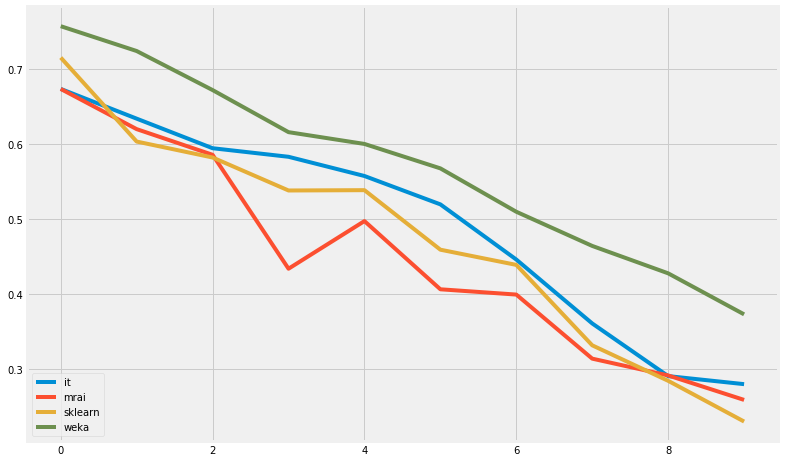

In [2]:
dfs = []
for name in {'weka', 'sklearn', 'SL', 'ML'}:
    fn = filename_results(name)
    dfs.append(pd.read_csv(fn))

df = pd.concat(dfs)

df_plot = df[['dataset', 'F1', 'difficulty', 'algorithm']].groupby(by=['algorithm', 'difficulty']).mean()


df_plot.head()

# Visuals
algorithms = df_plot.index.levels[0].unique().values.tolist()

x = df_plot.index.levels[1].values.tolist()

y = dict()
labels = []

fig=plt.figure(figsize=(12, 8))
for trace in algorithms:
    y[trace] = df_plot.loc[trace].values
    plt.plot(x, y[trace])
    labels.append(trace)



plt.legend(labels, loc='lower left')
plt.show()

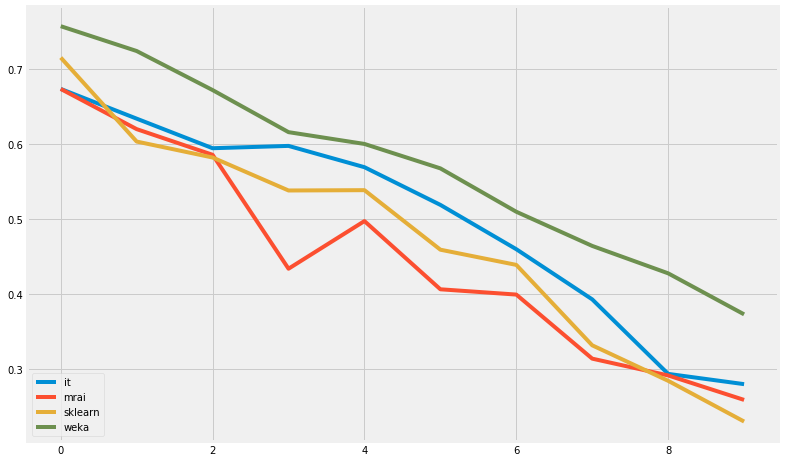

In [5]:
dfs = []
for name in {'weka', 'sklearn', 'SL', 'ML'}:
    fn = filename_results(name)
    dfs.append(pd.read_csv(fn))

df = pd.concat(dfs)

df_plot = df[['dataset', 'F1', 'difficulty', 'algorithm']].groupby(by=['algorithm', 'difficulty']).mean()


df_plot.head()

# Visuals
algorithms = df_plot.index.levels[0].unique().values.tolist()

x = df_plot.index.levels[1].values.tolist()

y = dict()
labels = []

fig=plt.figure(figsize=(12, 8))
for trace in algorithms:
    y[trace] = df_plot.loc[trace].values
    plt.plot(x, y[trace])
    labels.append(trace)



plt.legend(labels, loc='lower left')
plt.show()

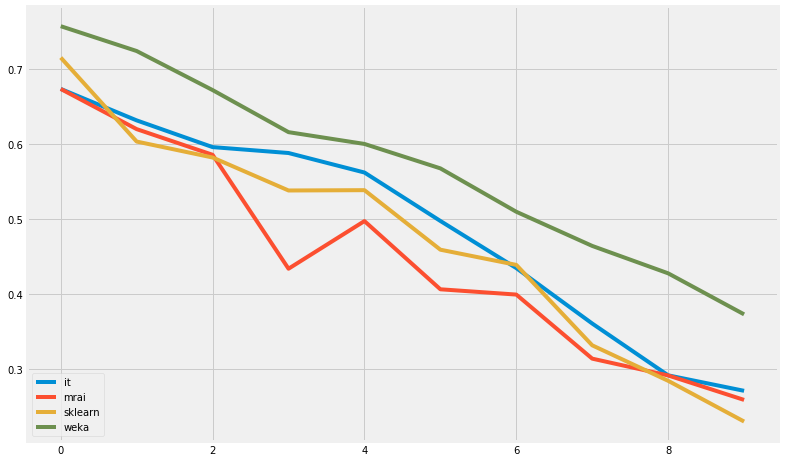

In [7]:
dfs = []
for name in {'weka', 'sklearn', 'SL', 'ML'}:
    fn = filename_results(name)
    dfs.append(pd.read_csv(fn))

df = pd.concat(dfs)

df_plot = df[['dataset', 'F1', 'difficulty', 'algorithm']].groupby(by=['algorithm', 'difficulty']).mean()


df_plot.head()

# Visuals
algorithms = df_plot.index.levels[0].unique().values.tolist()

x = df_plot.index.levels[1].values.tolist()

y = dict()
labels = []

fig=plt.figure(figsize=(12, 8))
for trace in algorithms:
    y[trace] = df_plot.loc[trace].values
    plt.plot(x, y[trace])
    labels.append(trace)



plt.legend(labels, loc='lower left')
plt.show()

In [12]:
import numpy as np
a = np.zeros((10, 5))
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [13]:
a[2, {1,3}] = 1

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Visuals

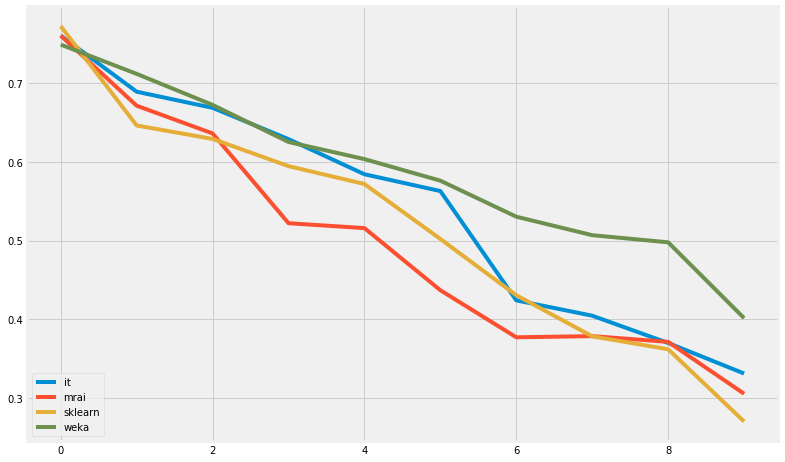

In [3]:
dfs = []
for name in {'weka', 'sklearn', 'SL', 'ML'}:
    fn = filename_results(name)
    dfs.append(pd.read_csv(fn))

df = pd.concat(dfs)
df['rank'] = df[['q_idx', 'dataset', 'F1']].groupby(by=['q_idx', 'dataset']).rank(ascending=False)

df = df[df['dataset'] != 'vehicle']
df = df[df['dataset'] != 'vowel']
df = df[df['dataset'] != 'balance-scale']
df = df[df['dataset'] != 'iris']
df = df[df['dataset'] != 'letter']
#df = df[df['dataset'] != 'waveform-5000']

df_plot = df[['dataset', 'F1', 'difficulty', 'algorithm', 'rank']].groupby(by=['algorithm', 'difficulty']).mean()

df_plot.head()



# Visuals
algorithms = df_plot.index.levels[0].unique().values.tolist()

x = df_plot.index.levels[1].values.tolist()

y = dict()
labels = []

fig=plt.figure(figsize=(12, 8))
for trace in algorithms:
    y[trace] = df_plot.loc[trace]['F1'].values
    
    plt.plot(x, y[trace])
    labels.append(trace)



plt.legend(labels, loc='lower left')
plt.show()

In [4]:
look at datasets
look at rank
maybe the one-hot encoding

otherwise, internally, you need a metric of performance

Q: Why does MRAI not work? Something seems really, really fishy about this.

SyntaxError: invalid syntax (<ipython-input-4-4959f3e60810>, line 1)